<a href="https://colab.research.google.com/github/Anushree-15-lab/Tech_Seminar_7A/blob/main/GrossEnrollmentRatio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt
import seaborn as sns
import geopandas as gpd

#hide warnings
import warnings
warnings.filterwarnings('ignore')
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [9]:
#load dataset
df_enroll = pd.read_csv('/content/gross-enrollment-ratio-2013-2016.csv')
df_enroll.sort_values(by='Year',inplace=True)

In [10]:
#rename States
df_enroll['State_UT'].replace({
    'MADHYA PRADESH':'Madhya Pradesh',
    'Pondicherry':'Puducherry',
    'Uttaranchal':'Uttar Pradesh'
},inplace=True)

In [11]:
#filter data
filt1 = (df_enroll['State_UT'] =='All India')

In [12]:
df_gre_total = df_enroll.loc[filt1]
boys_col = ['Primary_Boys','Upper_Primary_Boys','Secondary_Boys','Higher_Secondary_Boys']
girls_col = ['Primary_Girls','Upper_Primary_Girls','Secondary_Girls','Higher_Secondary_Girls']

In [13]:
#convert object to float
df_gre_total.loc[:,'Higher_Secondary_Boys']=df_gre_total.loc[:,'Higher_Secondary_Boys'].astype('float')
df_gre_total.loc[:,'Higher_Secondary_Girls']=df_gre_total.loc[:,'Higher_Secondary_Girls'].astype('float')

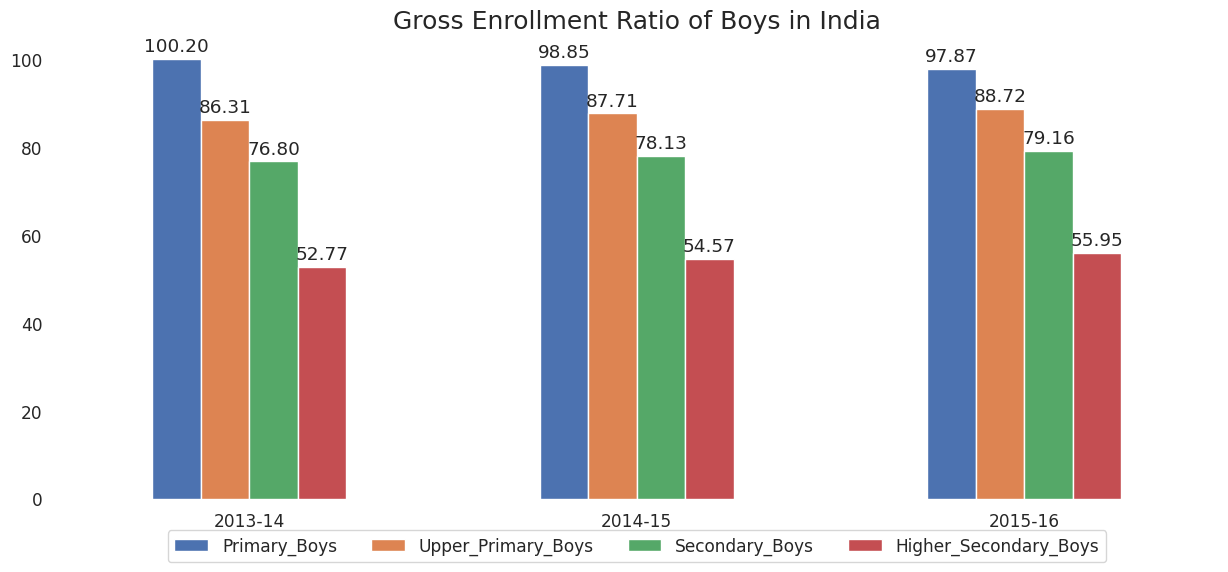

In [14]:
sns.set(font_scale = 1.11)
sns.set_style("white")
ax = df_gre_total[boys_col].plot.bar(figsize=(15,6))
sns.despine(left=True, bottom=True)

#label and title
ax.set_xticklabels(np.arange(3))
ax.set_title('Gross Enrollment Ratio of Boys in India',size=18)
ax.set_xticklabels(list(df_gre_total['Year']))
for tick in ax.get_xticklabels():
    tick.set_rotation(-0)

#annotations
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 9),
                   textcoords = 'offset points')
    #adjust legend
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),ncol=4)